In [1]:
# Start by importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read the cleaned data as a data frame.
path = "Resources2/cleaned_data.csv"
data_df = pd.read_csv(path)

In [3]:
# Adding Timestamp column as a concatenation of Date and Time.
data_df['Timestamp'] = data_df['Date'] + " " + data_df['Time']
data_df.head(10)

,Unnamed: 0,Participant,Date,Day,Time,Notification.No,Responded,Completed.Session,Session.Instance,Fatigue,...,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,AutoPSMU,News,Active,Timestamp
0,0,115091,05/02/2017,Tuesday,10:00:06,1,1,1,1.0,61.0,...,64.0,68.0,50.0,56.0,73.0,66.0,66,39.0,38.0,05/02/2017 10:00:06
1,1,115091,05/02/2017,Tuesday,12:02:48,2,1,1,2.0,28.0,...,70.0,58.0,37.0,56.0,67.0,0.0,#skipped#,27.0,23.0,05/02/2017 12:02:48
2,2,115091,05/02/2017,Tuesday,14:03:02,3,1,1,3.0,24.0,...,70.0,67.0,26.0,38.0,39.0,63.0,56,34.0,36.0,05/02/2017 14:03:02
3,3,115091,05/02/2017,Tuesday,16:34:28,4,1,1,4.0,63.0,...,79.0,89.0,30.0,20.0,60.0,67.0,68,29.0,23.0,05/02/2017 16:34:28
4,5,115091,05/02/2017,Tuesday,20:02:12,6,1,1,5.0,16.0,...,27.0,83.0,15.0,3.0,25.0,16.0,10,0.0,0.0,05/02/2017 20:02:12
5,6,115091,05/02/2017,Tuesday,22:01:31,7,1,1,6.0,58.0,...,44.0,72.0,25.0,17.0,52.0,6.0,2,8.0,1.0,05/02/2017 22:01:31
6,7,115091,05/03/2017,Wednesday,10:02:28,1,1,1,7.0,69.0,...,59.0,38.0,13.0,15.0,25.0,57.0,61,21.0,57.0,05/03/2017 10:02:28
7,8,115091,05/03/2017,Wednesday,12:04:05,2,1,1,8.0,69.0,...,64.0,61.0,11.0,19.0,21.0,16.0,18,10.0,16.0,05/03/2017 12:04:05
8,10,115091,05/03/2017,Wednesday,16:17:52,4,1,1,9.0,86.0,...,63.0,66.0,9.0,18.0,69.0,55.0,18,4.0,25.0,05/03/2017 16:17:52
9,11,115091,05/03/2017,Wednesday,18:06:06,5,1,1,10.0,71.0,...,69.0,81.0,17.0,15.0,61.0,69.0,61,20.0,15.0,05/03/2017 18:06:06


In [5]:
# Creating list of participants that we will later user to calculate average time between notifications per participant.
participants_array = data_df['Participant'].unique()
participants_array
participants_list = []
for x in participants_array:
    participants_list.append(x)
participants_list

[115091,
 131183,
 438907,
 515070,
 572172,
 680605,
 696084,
 697356,
 857523,
 883656,
 1102830,
 1156365,
 1274514,
 1318587,
 1500743,
 1562380,
 1875048,
 1950924,
 2042298,
 2184694,
 2396819,
 2541525,
 2542060,
 2643380,
 2675542,
 2721626,
 2823696,
 2865822,
 2932753,
 3044816,
 3065915,
 3158214,
 3234198,
 3259101,
 3389164,
 3454737,
 3462095,
 3482879,
 3519030,
 3600106,
 3690607,
 3842615,
 3885552,
 3939906,
 3966074,
 4025837,
 4107491,
 4188405,
 4348581,
 4426159,
 4545717,
 4562056,
 4620015,
 4623292,
 4794044,
 4804938,
 4850438,
 4966226,
 5089192,
 5101138,
 5133272,
 5244906,
 5269413,
 5441446,
 5485419,
 5625691,
 5663344,
 5670059,
 5684045,
 5720405,
 5834887,
 5837716,
 6020145,
 6203827,
 6226044,
 6300494,
 6456050,
 6523567,
 6716111,
 6722827,
 6749883,
 6798048,
 7027026,
 7029462,
 7107080,
 7259635,
 7303101,
 7345751,
 7403375,
 7534682,
 7594978,
 7706886,
 7895291,
 7949149,
 8039514,
 8055680,
 8090378,
 8114008,
 8282508,
 8353768,
 8380353,


In [6]:
# Changing format of Timestamp from string to datetime so we can use it for calculations.
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], dayfirst=False)

# Calculating average intervals between notifications per participant. I am creating it in both time and minutes formats for demonstration.
avg_time_list = []
avg_minutes_list = []
# We can do a for loop through the participants_list we created to
# calculate the average time interval for each participant.

# The time_value will equal the latest timestamp of a participant
# minus the earliest timestamp, divided by the total number of
# notifications for that participant.

# I am using the .count() function to determine how many notifications
# each participant has in the spreadsheet.


for x in participants_list:
    time_value = ((data_df[data_df['Participant'] == x]['Timestamp'].max() - data_df[data_df['Participant'] == x]['Timestamp'].min()).total_seconds() / data_df[data_df['Participant'] == x]['Notification.No'].count())
    # Since time_value is calculated with total_seconds(), the number
    # of minutes will be time_value divided by 60.
    avg_minutes_list.append(int(time_value / 60))
    # The time format will be the time_value converted to timedelta,
    # with seconds as our unit.
    time_value = pd.to_timedelta(time_value, unit='seconds')
    avg_time_list.append(time_value)
# Testing both lists to ensure they were created successfully.
print(avg_time_list[0])
print(avg_minutes_list[0])

0 days 04:12:49.376623
252


In [6]:
# Creating a new data frame that contains the average scores for each
# participant, also including their respective average minutes
# between notifications.
data_averages_df = pd.DataFrame({
    "Average Minutes between Notifications": avg_minutes_list,
    "Average Time between Notifications": avg_time_list,
    "News Average": round(data_df['News'].groupby(data_df['Participant']).mean(), 2),
    "Fatigue Average": round(data_df['Fatigue'].groupby(data_df['Participant']).mean(), 2),
    "Depressed Mood Average": round(data_df['DeprMood'].groupby(data_df['Participant']).mean(), 2),
    "Loneliness Average": round(data_df['Loneliness'].groupby(data_df['Participant']).mean(),2),
    "Concentration Average": round(data_df['Concentrat'].groupby(data_df['Participant']).mean(), 2),
    "Loss of Interest Average": round(data_df['LossOfInt'].groupby(data_df['Participant']).mean(), 2),
    "Inferior Average": round(data_df['Inferior'].groupby(data_df['Participant']).mean(), 2),
    "Hopeless Average": round(data_df['Hopeless'].groupby(data_df['Participant']).mean(), 2),
    "Stress Average": round(data_df['Stress'].groupby(data_df['Participant']).mean(), 2),
    "PSMU Average": round(data_df['PSMU'].groupby(data_df['Participant']).mean(), 2),
    "Active Average": round(data_df['Active'].groupby(data_df['Participant']).mean(), 2)
})

data_averages_df

,Average Minutes between Notifications,Average Time between Notifications,News Average,Fatigue Average,Depressed Mood Average,Loneliness Average,Concentration Average,Loss of Interest Average,Inferior Average,Hopeless Average,Stress Average,PSMU Average,Active Average
Participant,,,,,,,,,,,,,
115091,252,04:12:49.376623,15.01,45.16,20.45,23.29,37.27,47.68,17.83,21.39,37.44,32.88,16.79
131183,329,05:29:28.355932,11.59,36.29,3.47,0.39,19.51,14.51,0.25,0.41,16.90,45.20,28.25
438907,413,06:53:37.127659,34.15,51.28,26.30,21.15,35.43,49.77,23.66,14.60,24.34,44.60,27.77
515070,357,05:57:03.826923,38.58,34.87,12.69,14.08,32.90,16.04,11.40,10.50,17.37,25.71,37.83
572172,221,03:41:08.863636,45.25,18.27,10.74,9.38,14.35,25.76,38.06,17.43,20.51,36.85,40.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585150,358,05:58:01.685185,1.02,58.02,7.59,0.50,6.96,22.00,0.02,0.24,3.72,21.59,9.61
9593823,286,04:46:33.746268,18.97,32.39,17.85,15.04,23.30,17.58,8.40,13.04,23.16,54.31,47.96
9813325,314,05:14:39.016393,18.97,18.97,10.08,7.84,8.05,10.18,7.85,6.95,9.69,18.75,12.70


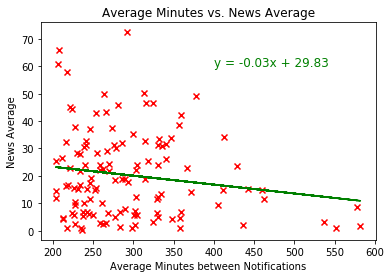

The correlation coefficient is -0.16.

T-Test:
Ttest_indResult(statistic=38.82243137563726, pvalue=7.265335972588298e-75)


In [7]:
# We will now create scatter plots to determine the relationship
# between average time between notifications and average score
# for each measured factor.
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['News Average']

# In addition to scatter charts, we will also include linear
# regression models to get a clearer sense of the relation
# between average time intervals and average scores.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,60), fontsize=12, color="green")
plt.title("Average Minutes vs. News Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("News Average")
# Saving the scatter plot as a .png for later use.
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_news.png')
plt.show()
# Finding the correlation coefficient.
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

# Finding the T-Test p value.
ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)

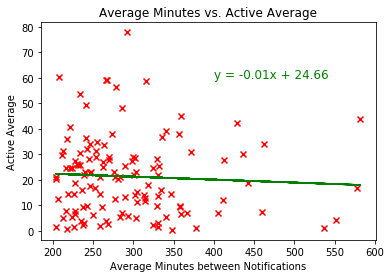

The correlation coefficient is -0.06.

T-Test:
Ttest_indResult(statistic=38.711530720718486, pvalue=1.360127340723101e-74)


In [8]:
# The process is the same for the rest of the scatter plots,
# except y_value will extract a different column from data_averages.
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['Active Average']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,60), fontsize=12, color="green")
plt.title("Average Minutes vs. Active Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Active Average")
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_active.png')
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)

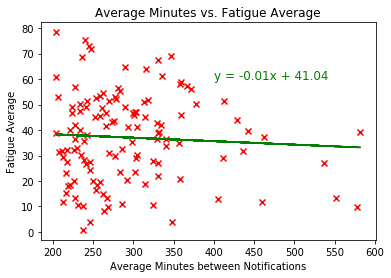

The correlation coefficient is -0.06.

T-Test:
Ttest_indResult(statistic=36.26866648771539, pvalue=5.430781102607177e-72)


In [9]:
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['Fatigue Average']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,60), fontsize=12, color="green")
plt.title("Average Minutes vs. Fatigue Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Fatigue Average")
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_fatigue.png')
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)

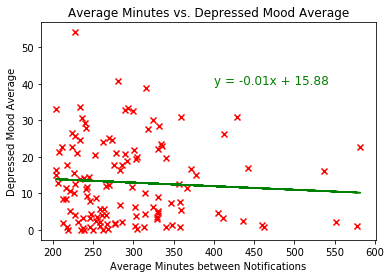

The correlation coefficient is -0.07.

T-Test:
Ttest_indResult(statistic=40.25413907267587, pvalue=5.311509221330444e-75)


In [10]:
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['Depressed Mood Average']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,40), fontsize=12, color="green")
plt.title("Average Minutes vs. Depressed Mood Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Depressed Mood Average")
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_depressedmood.png')
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)

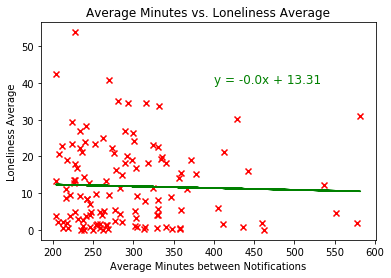

The correlation coefficient is -0.03.

T-Test:
Ttest_indResult(statistic=40.427655804912355, pvalue=3.6133324269602083e-75)


In [11]:
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['Loneliness Average']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,40), fontsize=12, color="green")
plt.title("Average Minutes vs. Loneliness Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Loneliness Average")
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_loneliness.png')
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)

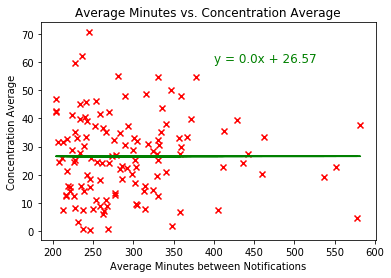

The correlation coefficient is 0.0.

T-Test:
Ttest_indResult(statistic=38.050576411935815, pvalue=3.041368293561465e-73)


In [12]:
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['Concentration Average']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,60), fontsize=12, color="green")
plt.title("Average Minutes vs. Concentration Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Concentration Average")
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_concentration.png')
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)

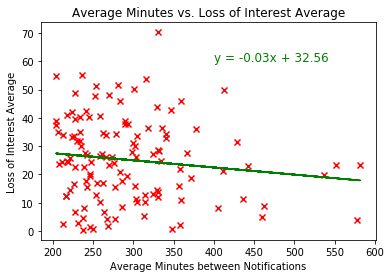

The correlation coefficient is -0.13.

T-Test:
Ttest_indResult(statistic=38.22361744860691, pvalue=1.3065151293577256e-73)


In [13]:
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['Loss of Interest Average']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,60), fontsize=12, color="green")
plt.title("Average Minutes vs. Loss of Interest Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Loss of Interest Average")
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_loi.png')
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)

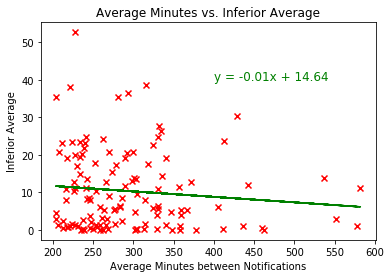

The correlation coefficient is -0.11.

T-Test:
Ttest_indResult(statistic=40.68712903823317, pvalue=2.529977446698426e-75)


In [14]:
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['Inferior Average']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,40), fontsize=12, color="green")
plt.title("Average Minutes vs. Inferior Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Inferior Average")
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_inferior.png')
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)

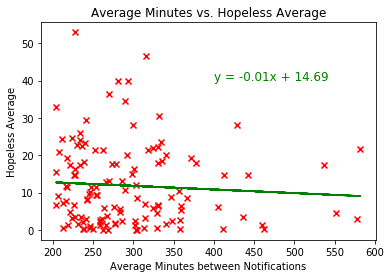

The correlation coefficient is -0.07.

T-Test:
Ttest_indResult(statistic=40.44531184628406, pvalue=3.9159729467763325e-75)


In [15]:
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['Hopeless Average']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,40), fontsize=12, color="green")
plt.title("Average Minutes vs. Hopeless Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Hopeless Average")
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_hopeless.png')
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)

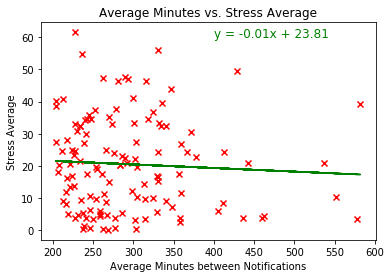

The correlation coefficient is -0.06.

T-Test:
Ttest_indResult(statistic=38.89739319669091, pvalue=1.8223707904458445e-74)


In [16]:
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['Stress Average']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,60), fontsize=12, color="green")
plt.title("Average Minutes vs. Stress Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("Stress Average")
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_stress.png')
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)

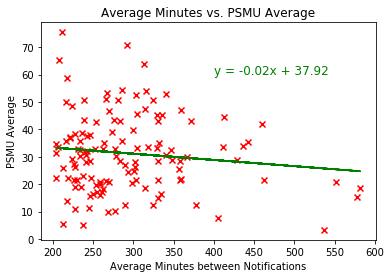

The correlation coefficient is -0.12.

T-Test:
Ttest_indResult(statistic=37.40421524494333, pvalue=3.204985436413147e-72)


In [18]:
x_val = data_averages_df['Average Minutes between Notifications']
y_val = data_averages_df['PSMU Average']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="x", facecolors="red")
plt.plot(x_val, regress_val, "r-", color="green")
plt.annotate(line_eq, (400,60), fontsize=12, color="green")
plt.title("Average Minutes vs. PSMU Average")
plt.xlabel("Average Minutes between Notifications")
plt.ylabel("PSMU Average")
plt.savefig('Images_Jacqueline/Overall_Scatter/min_vs_psmu.png')
plt.show()
print(f'The correlation coefficient is {round(st.pearsonr(x_val, y_val)[0], 2)}.')
print("")

ttest = st.ttest_ind(x_val, y_val, equal_var=False)

print("T-Test:")
print(ttest)